Shape: (21925, 46)


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
BGGId,21925.0,NaN,NaN,NaN,117652.663216,104628.721777,1.0,12346.0,105305.0,206169.0,349161.0
Name,21925,21521,Robin Hood,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Description,21924,21903,happen black story fiddly morbid mysterious ri...,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YearPublished,21925.0,NaN,NaN,NaN,1985.494914,212.486214,-3500.0,2001.0,2011.0,2017.0,2021.0
GameWeight,21925.0,NaN,NaN,NaN,1.982131,0.848983,0.0,1.3333,1.9688,2.5252,5.0
ComWeight,21925.0,NaN,NaN,NaN,2.177479,0.861781,0.0,1.5134,2.128,2.7377,5.2132
MinPlayers,21925.0,NaN,NaN,NaN,2.007343,0.693093,0.0,2.0,2.0,2.0,10.0
MaxPlayers,21925.0,NaN,NaN,NaN,5.707868,15.014643,0.0,4.0,4.0,6.0,999.0
ComAgeRec,16395.0,NaN,NaN,NaN,10.004391,3.269157,2.0,8.0,10.0,12.0,21.0
LanguageEase,16034.0,NaN,NaN,NaN,216.461819,236.595136,1.0,24.027778,138.0,351.0,1757.0



Tipi di variabili:
int64      36
object      6
float64     4
Name: count, dtype: int64


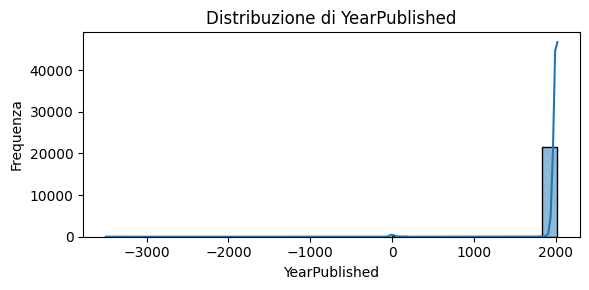

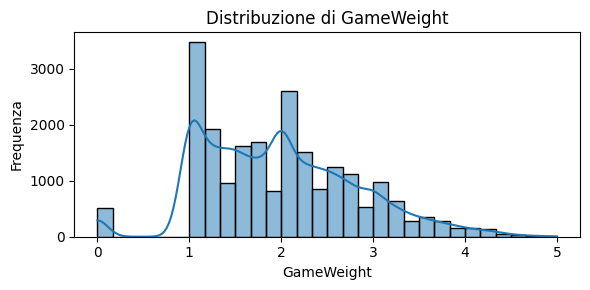

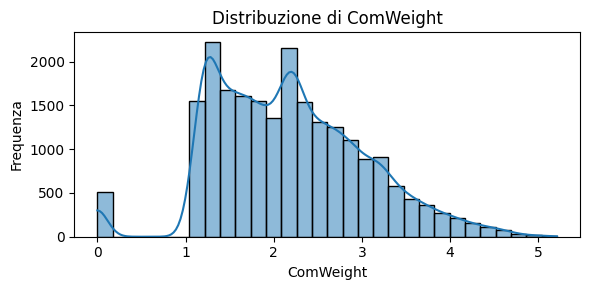

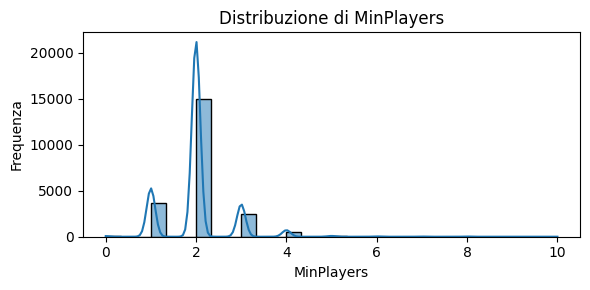

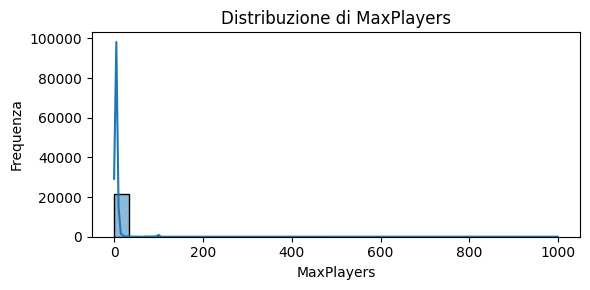

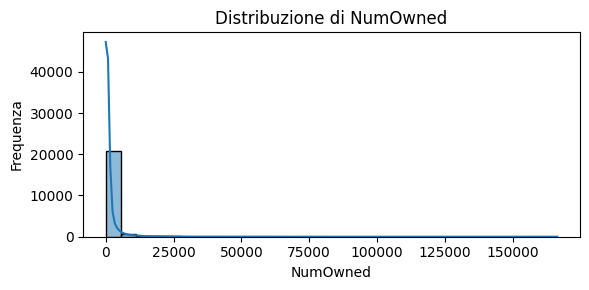

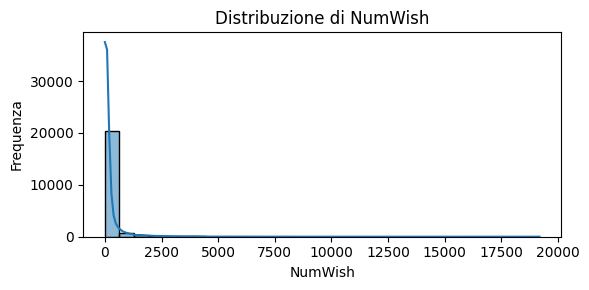

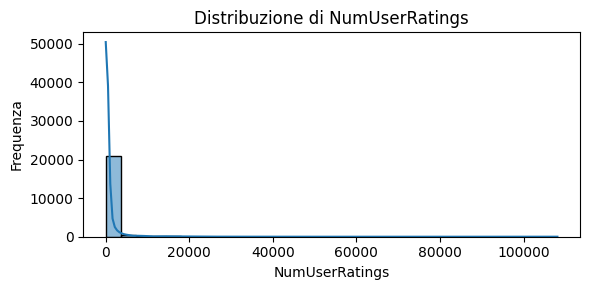

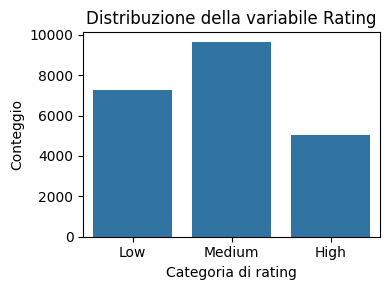


Percentuale di valori mancanti per colonna:


Family          69.6
LanguageEase    26.9
ComAgeRec       25.2
ImagePath        0.1
Description      0.0
dtype: float64

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carica il dataset iniziale
df = pd.read_csv("DM1_game_dataset.csv")

# --- 1. Statistiche generali ---
print(f"Shape: {df.shape}")
display(df.describe(include='all').transpose())

# --- 2. Tipi di variabili ---
print("\nTipi di variabili:")
print(df.dtypes.value_counts())

# --- 3. Distribuzioni principali ---
numeric_cols = ["YearPublished", "GameWeight", "ComWeight", "MinPlayers", 
                "MaxPlayers", "NumOwned", "NumWish", "NumUserRatings"]

for col in numeric_cols:
    plt.figure(figsize=(6,3))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribuzione di {col}")
    plt.xlabel(col)
    plt.ylabel("Frequenza")
    plt.tight_layout()
    plt.show()

# --- 4. Analisi della variabile Rating ---
plt.figure(figsize=(4,3))
sns.countplot(x="Rating", data=df)
plt.title("Distribuzione della variabile Rating")
plt.xlabel("Categoria di rating")
plt.ylabel("Conteggio")
plt.tight_layout()
plt.show()

# --- 5. Percentuali di missing values ---
missing = df.isna().mean().sort_values(ascending=False)
print("\nPercentuale di valori mancanti per colonna:")
display(missing[missing > 0].round(3) * 100)


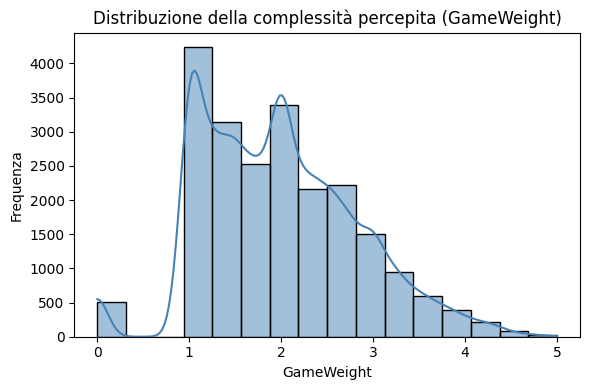

In [6]:
plt.figure(figsize=(6,4))
sns.histplot(df["GameWeight"], kde=True, bins=16 , color="steelblue")
plt.title("Distribuzione della complessità percepita (GameWeight)")
plt.xlabel("GameWeight")
plt.ylabel("Frequenza")
plt.tight_layout()


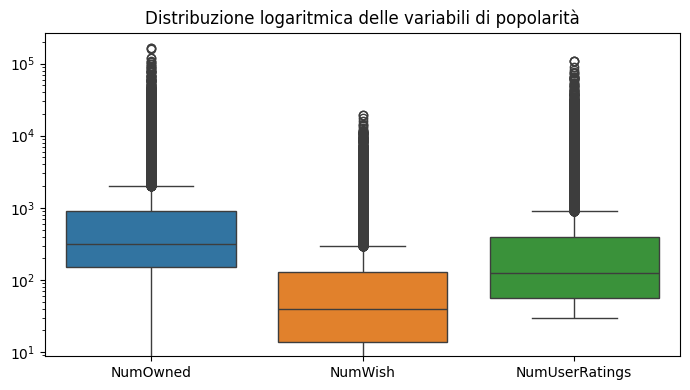

In [ ]:
plt.figure(figsize=(7,4))
sns.boxplot(data=df[["NumOwned", "NumWish", "NumUserRatings"]])
plt.yscale("log")
plt.title("Distribuzione logaritmica delle variabili di popolarità")
plt.tight_layout()



C:\Users\lucon\AppData\Local\Temp\ipykernel_29040\3497860311.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Rating", data=df, order=["Low", "Medium", "High"], palette="pastel")


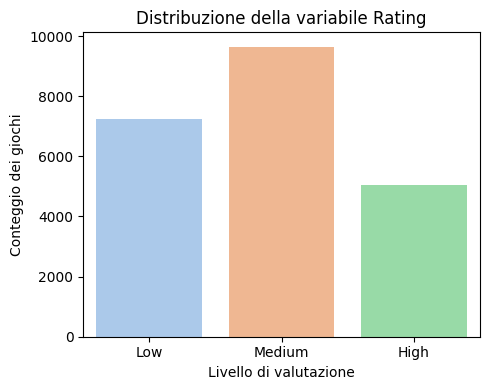

In [ ]:
plt.figure(figsize=(5,4))
sns.countplot(x="Rating", data=df, order=["Low", "Medium", "High"], palette="pastel")
plt.title("Distribuzione della variabile Rating")
plt.xlabel("Livello di valutazione")
plt.ylabel("Conteggio dei giochi")
plt.tight_layout()



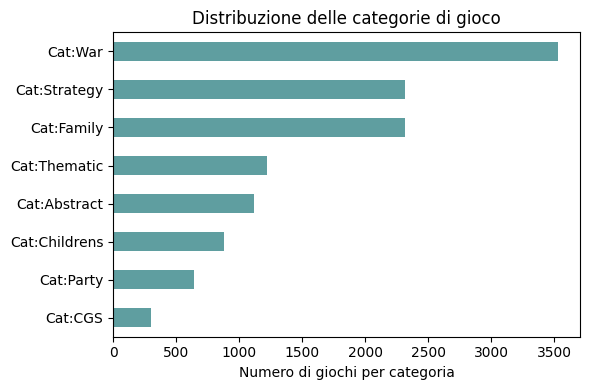

In [11]:
cat_cols = [c for c in df.columns if c.startswith("Cat:")]
cat_counts = df[cat_cols].sum().sort_values(ascending=True)

plt.figure(figsize=(6,4))
cat_counts.plot(kind="barh", color="cadetblue")
plt.title("Distribuzione delle categorie di gioco")
plt.xlabel("Numero di giochi per categoria")
plt.tight_layout()
plt.savefig("reports/figures/dist_categories.pdf")
